In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras import applications
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, AveragePooling2D  
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.metrics import categorical_crossentropy
  from tensorflow.keras.preprocessing.image import  ImageDataGenerator
  from sklearn.metrics import confusion_matrix
  import itertools
  import os
  import cv2
  import shutil
  import random
  import glob
  import matplotlib.pyplot as plt
  import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

In [3]:
train_path = '/content/drive/MyDrive/SignatureAuthentication/Train'
valid_path = '/content/drive/MyDrive/SignatureAuthentication/Valid'
test_path = '/content/drive/MyDrive/SignatureAuthentication/Test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(224, 224), classes=['forgeries', 'genuines'], batch_size=7)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['forgeries', 'genuines'], batch_size=8)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(224, 224), classes=['forgeries', 'genuines'], batch_size=7, shuffle=False)

Found 1106 images belonging to 2 classes.
Found 312 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [4]:
assert train_batches.n == 1106
assert valid_batches.n == 312
assert test_batches.n == 156
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [5]:
Vgg19model = applications.vgg19.VGG19(weights='imagenet', include_top=False, pooling='max')

80150528/80134624 [==============================] - 1s 0us/step


In [6]:
Vgg19model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [7]:
model = Sequential()
for layer in Vgg19model.layers:
  model.add(layer)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0         
                                                                 
 block3_conv1 (Conv2D)       (None, None, None, 256)   2

In [9]:
for layer in model.layers:
  layer.trainable = False

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0         
                                                                 
 block3_conv1 (Conv2D)       (None, None, None, 256)   2

In [11]:
model.add(Flatten(input_shape=model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(units = 2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0         
                                                                 
 block3_conv1 (Conv2D)       (None, None, None, 256)   2

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20,steps_per_epoch= 158, validation_steps=39)
model.save('/content/drive/MyDrive/Project/vgg19_SignatureAuthentication_N.h5')

Epoch 1/20
158/158 [==============================] - 926s 6s/step - loss: 6.1826 - accuracy: 0.5606 - val_loss: 3.9567 - val_accuracy: 0.6122
Epoch 2/20
158/158 [==============================] - 905s 6s/step - loss: 2.6654 - accuracy: 0.6682 - val_loss: 3.0603 - val_accuracy: 0.6474
Epoch 3/20
158/158 [==============================] - 905s 6s/step - loss: 1.4640 - accuracy: 0.7685 - val_loss: 2.6805 - val_accuracy: 0.6859
Epoch 4/20
158/158 [==============================] - 905s 6s/step - loss: 0.9173 - accuracy: 0.8363 - val_loss: 2.2090 - val_accuracy: 0.7147
Epoch 5/20
158/158 [==============================] - 905s 6s/step - loss: 0.6197 - accuracy: 0.8508 - val_loss: 2.0320 - val_accuracy: 0.7276
Epoch 6/20
158/158 [==============================] - 906s 6s/step - loss: 0.4487 - accuracy: 0.8870 - val_loss: 2.1188 - val_accuracy: 0.7468
Epoch 7/20
158/158 [==============================] - 904s 6s/step - loss: 0.2153 - accuracy: 0.9313 - val_loss: 2.1582 - val_accuracy: 0.7244

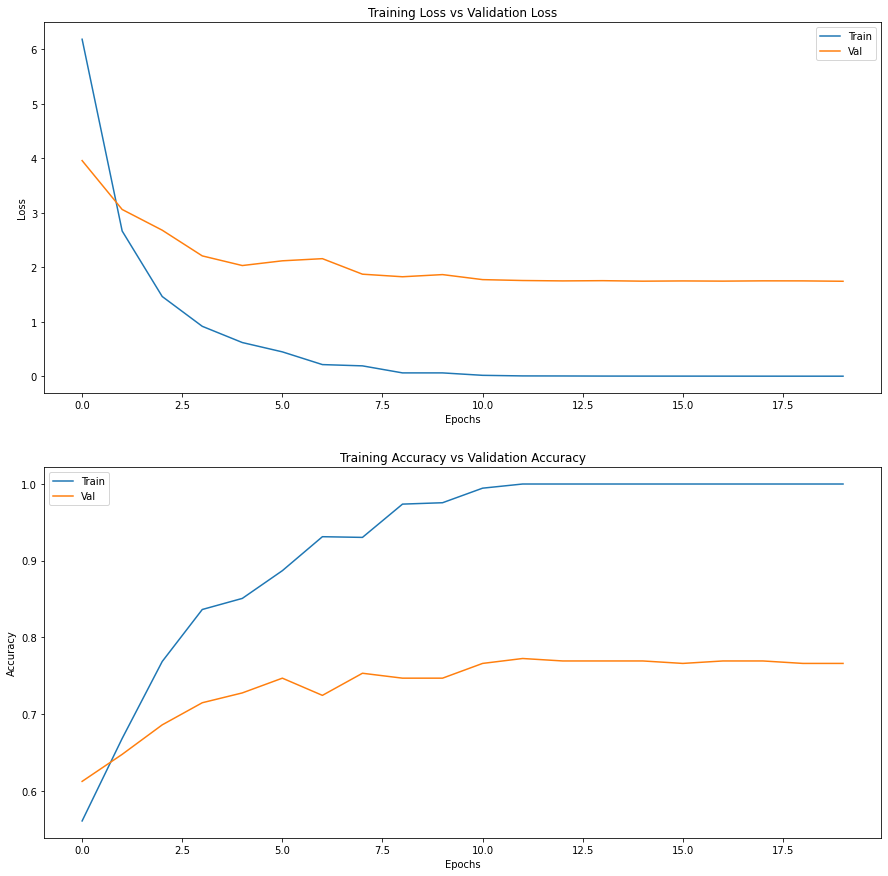

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [16]:
# MyModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# MyModel.load_weights('/content/drive/MyDrive/SignatureAuthentication/TrainedWeights/Resnet50_SignatureDetection_N.h5')
MyModel = tf.keras.models.load_model('/content/drive/MyDrive/SignatureAuthentication/TrainedWeights/vgg19_SignatureAuthentication_N.h5')

loss, acc = MyModel.evaluate(test_batches, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

23/23 - 101s - loss: 1.5981 - accuracy: 0.7564 - 101s/epoch - 4s/step
Restored model, accuracy: 75.64%


In [17]:
predictions = MyModel.predict(x = test_batches, verbose = 2)

23/23 - 101s - 101s/epoch - 4s/step


In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [20]:
test_batches.class_indices

{'forgeries': 0, 'genuines': 1}

Confusion matrix, without normalization
[[43 19]
 [19 75]]


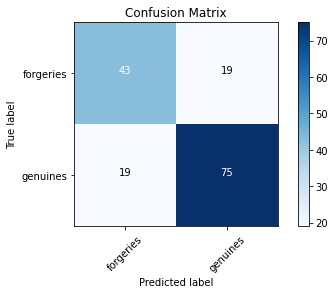

In [21]:
cm_plot_labels = ['forgeries', 'genuines']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')